In [76]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.optimize import minimize

In [10]:
# Load data
data = loadmat('./ex5data1.mat')
X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']
print(X.shape)
print(y.shape)

(12, 1)
(12, 1)


### 1.1 Visualizing the dataset

In [28]:
def plot_data(X, y, label_x, label_y, axes=None):
    if not axes:
        axes = plt.gca()
    axes.scatter(X,y, label='Training data', marker='x')
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend()

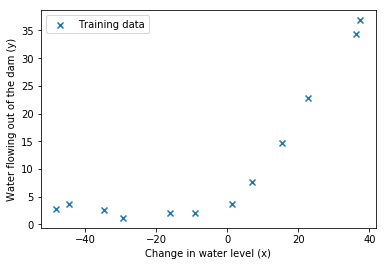

In [29]:
plot_data(X, y, 'Change in water level (x)', 'Water flowing out of the dam (y)')

### 1.2 Regularized linear regression cost function

In [193]:
def linear_reg_cost_function(theta, X, y, lamb=1):
    m = len(y)
    hx = X.dot(theta.reshape(-1,1))
    J = (1/(2*m))*(np.sum(np.square(hx-y))) + (lamb/(2*m))*(np.sum(np.square(theta[1:])))
    
    return J

In [203]:
def linear_reg_gradient(theta, X, y, lamb=1):
    m = len(y)
    hx = X.dot(theta.reshape(-1,1))
    grad = (1/m)*((hx-y).T.dot(X)) + (lamb/m)*(np.c_[[0],theta[1:]])
    
    return grad.flatten()

In [204]:
X_in = np.c_[np.ones((X.shape[0],1)), X]
theta_init = np.ones((X_in.shape[1]))

In [205]:
cost = linear_reg_cost_function(theta_init, X_in, y, 1)
grad = linear_reg_gradient(theta_init, X_in, y, 1)
print(cost)
print(grad)

303.9931922202643
[-15.30301567 598.25074417]


### 1.4 Fitting linear regression

In [208]:
def train_linear_reg(X, y, lamb):
    theta = np.ones((X.shape[1]))
    res = minimize(linear_reg_cost_function, theta, method='CG', args=(X,y,lamb), \
                   jac=linear_reg_gradient, options={'disp': True})
    
    return res.x

In [209]:
theta = train_linear_reg(X_in, y, 0)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28


In [228]:
def predict(theta, X):
    X_2d = X.reshape(-1,1)
    X_in = np.c_[np.ones((X_2d.shape[0],1)), X_2d]
    return X_in.dot(theta.reshape(-1,1)).flatten()

In [237]:
def plot_fit(theta, X, y):
    X_min, X_max = np.min(X), np.max(X)
    plot_X = np.linspace(X_min, X_max)
    plot_y = predict(theta, plot_X)
    plt.plot(plot_X, plot_y,label='Linear fit', color='r')
    plot_data(X, y, 'Change in water level (x)', 'Water flowing out of the dam (y)', plt.gca())

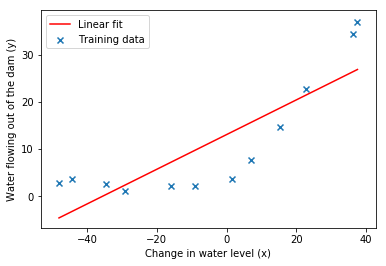

In [238]:
plot_fit(theta, X, y)